C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


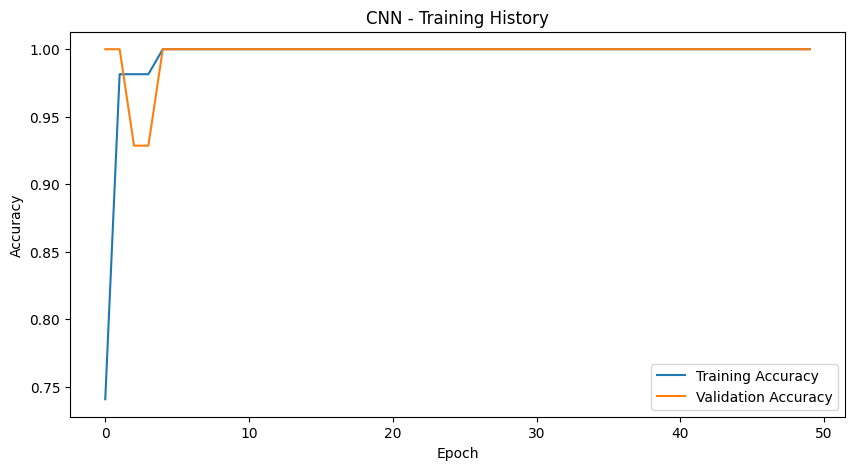

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
CNN - Test Accuracy: 1.0000

Confusion Matrix:
[[15  0]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


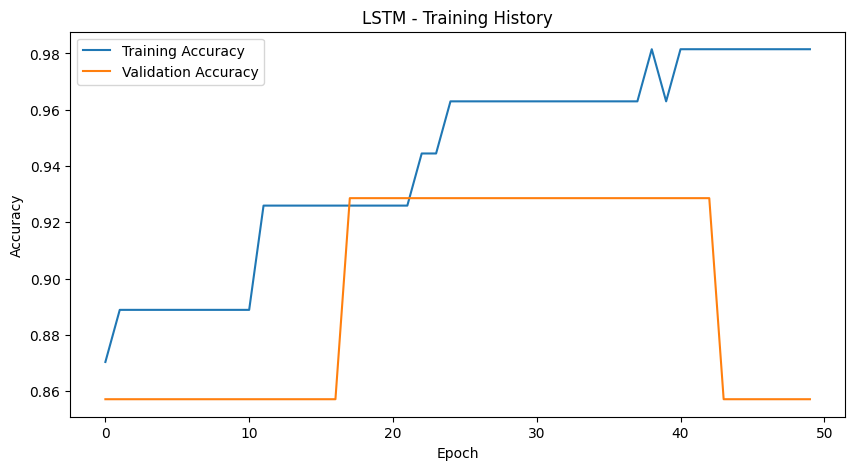

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
LSTM - Test Accuracy: 0.9667

Confusion Matrix:
[[15  0]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


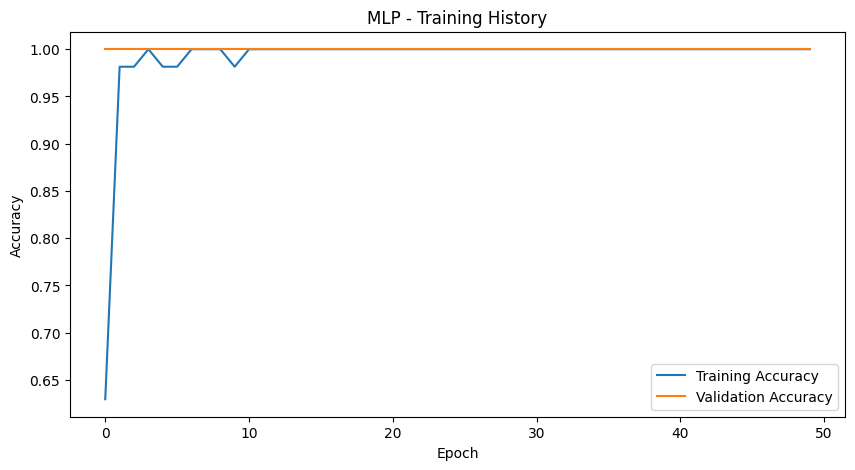

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
MLP - Test Accuracy: 0.9333

Confusion Matrix:
[[13  2]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



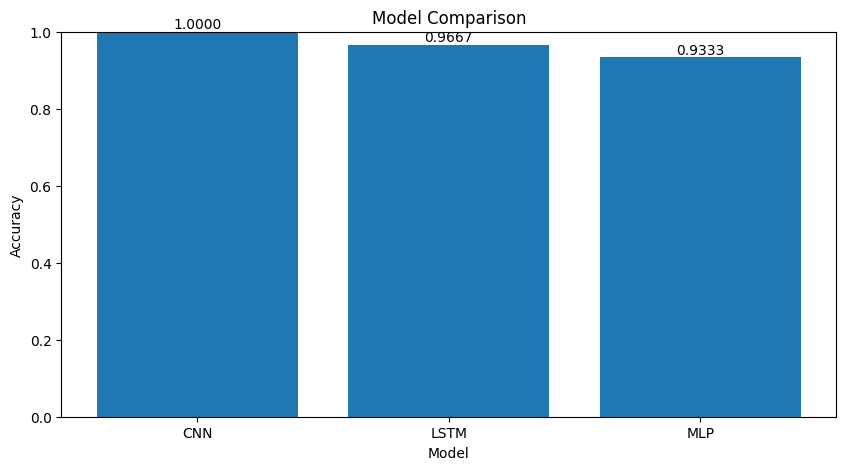

Best model saved as 'best_model.h5'


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data():
    # Read the Excel files
    df1 = pd.read_excel('source_1.xlsx')
    df2 = pd.read_excel('source_2.xlsx')
    
    # Drop the first 6 columns
    df1 = df1.iloc[:, 6:]
    df2 = df2.iloc[:, 6:]
    
    # Rename columns
    new_columns = [f'DF-{i+1}' for i in range(len(df1.columns))]
    df1.columns = new_columns
    df2.columns = new_columns
    
    # Add class column
    df1['class'] = 0
    df2['class'] = 1
    
    # Concatenate the dataframes
    df = pd.concat([df1, df2], ignore_index=True)
    
    # Shuffle the dataframe
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Separate features and target
    X = df.drop('class', axis=1)
    y = df['class']
    
    return X, y

X, y = load_data()

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN and LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define models
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Evaluate on test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, accuracy

# Create and train models
cnn_model, cnn_accuracy = train_and_evaluate(create_cnn_model((X_train_reshaped.shape[1], 1)), 
                                             X_train_reshaped, y_train, X_test_reshaped, y_test, "CNN")

lstm_model, lstm_accuracy = train_and_evaluate(create_lstm_model((X_train_reshaped.shape[1], 1)), 
                                               X_train_reshaped, y_train, X_test_reshaped, y_test, "LSTM")

mlp_model, mlp_accuracy = train_and_evaluate(create_mlp_model(X_train_scaled.shape[1:]), 
                                             X_train_scaled, y_train, X_test_scaled, y_test, "MLP")

# Compare model accuracies
models = ['CNN', 'LSTM', 'MLP']
accuracies = [cnn_accuracy, lstm_accuracy, mlp_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Save the best model
best_model = max([(cnn_model, cnn_accuracy), (lstm_model, lstm_accuracy), (mlp_model, mlp_accuracy)], 
                 key=lambda x: x[1])[0]
best_model.save('best_model.h5')
print("Best model saved as 'best_model.h5'")